

https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch

In [1]:
from google.colab import drive
drive.mount("/CNN")

Drive already mounted at /CNN; to attempt to forcibly remount, call drive.mount("/CNN", force_remount=True).


In [2]:
#!unzip "/CNN/MyDrive/Classification algorithm/CNN/dataset classification.zip" -d "/CNN/MyDrive/Classification algorithm/CNN"

In [3]:
import numpy as np
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, imageio
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
#import libraries and pckages
from tensorflow.keras.models import Sequential
#Sequential is used to initialize our neural netwotrk
#two way to initialize our neural netwotrk
# 1.sequence of a layer
# 2.as a graph
from tensorflow.keras.layers import Convolution2D
#image 2 dimension but video 3 dimension
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
#dense is used to add fully connected layer in a classic
#(classic) artificial neural network

In [5]:

#initializing the CNN
classifier=Sequential()


In [6]:

#step 1: Convolution  that means
#add a convolutional layer which takes the input image:
classifier.add(Convolution2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
#number of filter=32,kernel size is 3x3 that means row=3,column=3
#2D image shape 256x256x2  3D image shape 256x256x3
#here for small calculation but geeting good accuracy we use 64x64x3(color image)
#classifier.add(Convolution2D(64,3,3,activation='relu'))
#as we specify input_shape=(64,64,3) at the above so no need to specify another time 



In [7]:

#step 2: Maxpooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
#subtble size or pool_size=(2,2)(khata dekho) and stride automatically 2
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))


In [8]:

#step 3: Flattening
classifier.add(Flatten())
classifier.add(Dense(96, activation='relu'))
classifier.add(Dropout(0.5))


In [9]:

#step 4: Full connection(fully connected layer)
#there are two important task of full connection
#  1) inputlayer er sathe fully connected layer er relation kora
#  2) output layer theke final prediction koraa
#image classification is a non-inear task
#binary outcome er activation='sigmoid'
#more than 2 (binary) binary outcome er activation='sigmoid'
#classifier.add(Dense(units= 128 ,activation='sigmoid'))
#Dense is a standard layer of the neural network in which each 
#neuron is connected to each neuron of the next layer.

#https://stats.stackexchange.com/questions/544337/same-loss-and-accuracy-on-epochs

# 4 class er jonno 4
classifier.add(Dense(4 ,activation='softmax'))
#units:Positive integer, dimensionality of the output space.that 
#means number of node in the hidden/fully connected layer



In [10]:

#Compiling the CNN
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#if the outcome is just 2, lossfunction will be loss='binary_crossentropy'
#if the outcome is more than 2, lossfunction will be loss='categorical_crossentropy'



In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

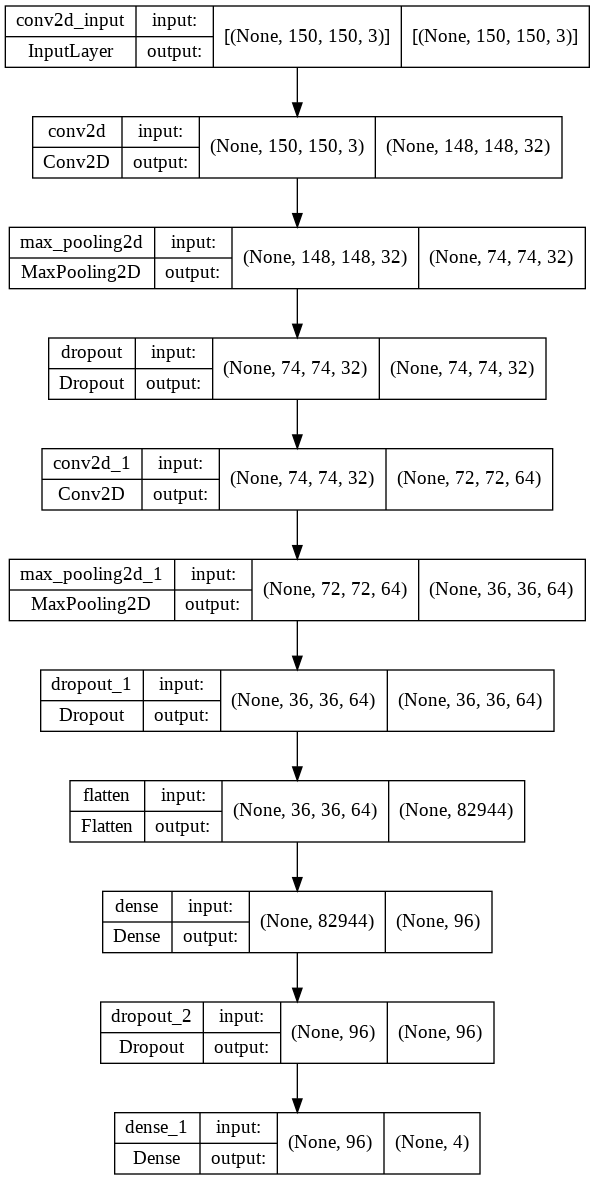

In [12]:
# plot the model architecture using plot_model function 

plot_model(classifier, to_file='model.png', show_shapes=True, show_layer_names=True)


In [13]:

#part -2 Ftting the mages to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


In [14]:

test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        '/CNN/MyDrive/Classification algorithm/CNN/dataset classification/train',
        target_size=(150, 150),
        #since input size is 64x64
        batch_size=10,
        #class_mode='binary'
        )


Found 900 images belonging to 4 classes.


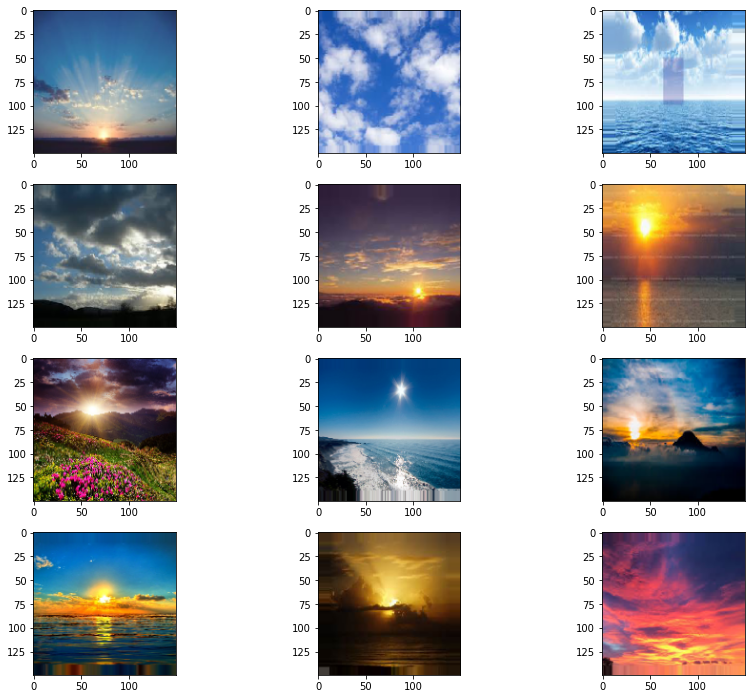

In [15]:
# Lets take a look at how augmented images from train generator look like

plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in training_set:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [16]:

test_set = test_datagen.flow_from_directory(
        '/CNN/MyDrive/Classification algorithm/CNN/dataset classification/test',
        target_size=(150, 150),
        #since input size is 64x64
        batch_size=10,
        #class_mode='binary'
        )



Found 230 images belonging to 4 classes.


https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch

In [17]:
# Saving Best model

checkpoint_path = "/CNN/MyDrive/Classification algorithm/CNN/checkpoint_path/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [18]:
#https://www.markiiisys.com/blog/keras-modelcheckpoint-callback-yet-another-great-one/
#https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6?gi=364699793ef8
import tensorflow as tf

checkpoint_callback_4  = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    #If save_weights_only is set to True, only the weights are saved, not the model topology.  
    #If set to False, it saves the weights as well as the model topology.
    save_weights_only=True,
    monitor='val_accuracy',     # monitor="loss",
    #If the value is set to True and you specify it to monitor loss, it will check the loss after every epoch
    #If the loss went down, then it will save that model.  If it didn't go down, it won't save it.
    save_best_only=True,
    # I'll share a secret.  You can use auto and Keras is smart enough to know that with loss, 
    #it should use min and with accuracy it should use max.
    mode="auto",
    #I am using epoch so it saves the model after every epoch,
    save_freq="epoch")


When to adjust steps-per-epoch

Traditionally, the steps per epoch is calculated as train_length // batch_size, since this will use all of the data points, one batch size worth at a time.

If you are augmenting the data, then you can stretch this a tad (sometimes I multiply that function above by 2 or 3 etc. But, if it's already training for too long, then I would just stick with the traditional approach.

steps_per_epoch = int( np.ceil(x_train.shape[0] / batch_size) )

https://github.com/fizyr/keras-retinanet/issues/1449

**Error:WARNING:tensorflow:Your input ran out of data; interrupting training**

if you using ImageDataGenerator function, try to change the batch_size method inside of flow_from_directory function, like this:

instantiating and setting up ImageDataGenerator:

training_generator = ImageDataGenerator(rescale=1./255, rotation_range=7, horizontal_flip=True,
shear_range=0.2, height_shift_range=0.07, zoom_range=0.2)

test_generator = ImageDataGenerator(rescale=1./255)

setting up training and test database:
here inside "flow_from_directory" set the "batch_size" to 1 if you wanna to use all files in your training and test database

training_base= training_generator.flow_from_directory('path_to_directory' , target_size=(100,100),batch_size=1,
class_mode='binary')

test_base = test_generator.flow_from_directory('path_to_directory', target_size=(100, 100),batch_size=1,
class_mode='binary')

after that, set the value for "steps_per_epoch" using the total number of files in your training database divided for batch_size set value, in this case 1. You need to do the same thing in "validation_steps", but instead use total value of training set, divided by total value of test database

classifier.fit_generator(training_base,steps_per_epoch=5216/1, epochs=5, validation_data= test_base,
validation_steps=624/1)

hope it helps you. sorry for my english.

In [19]:
#error : WARNING:tensorflow:Your input ran out of data; interrupting training
#https://github.com/fizyr/keras-retinanet/issues/1449
model=classifier.fit_generator(
        training_set,
        #https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch
        steps_per_epoch=90,
        #not samples_per_epoch=8000
        #steps_per_epoch=8000,
        
        epochs=63,
        #not nb_epoch=130,
        validation_data=test_set,
        validation_steps=23,
        callbacks=[checkpoint_callback_4]
        )
        #we dont use  nb_val_samples=800
        #since test_set has 2000 images



Epoch 1/63


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


90/90 [==============================] - ETA: 0s - loss: 1.1871 - accuracy: 0.5811
Epoch 1: val_accuracy improved from -inf to 0.70435, saving model to /CNN/MyDrive/Classification algorithm/CNN/checkpoint_path/cp-0001.ckpt
90/90 [==============================] - 15s 136ms/step - loss: 1.1871 - accuracy: 0.5811 - val_loss: 0.9244 - val_accuracy: 0.7043
Epoch 2/63
90/90 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.7478
Epoch 2: val_accuracy improved from 0.70435 to 0.88261, saving model to /CNN/MyDrive/Classification algorithm/CNN/checkpoint_path/cp-0002.ckpt
90/90 [==============================] - 12s 138ms/step - loss: 0.6399 - accuracy: 0.7478 - val_loss: 0.6269 - val_accuracy: 0.8826
Epoch 3/63
90/90 [==============================] - ETA: 0s - loss: 0.5545 - accuracy: 0.7844
Epoch 3: val_accuracy improved from 0.88261 to 0.89130, saving model to /CNN/MyDrive/Classification algorithm/CNN/checkpoint_path/cp-0003.ckpt
90/90 [==============================] 

In [54]:

metrics_df.columns


Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

https://github.com/TasnimAhmedEee/Multi-Class-Image-Classification/blob/master/Multiclass%20Image%20Classifier.ipynb

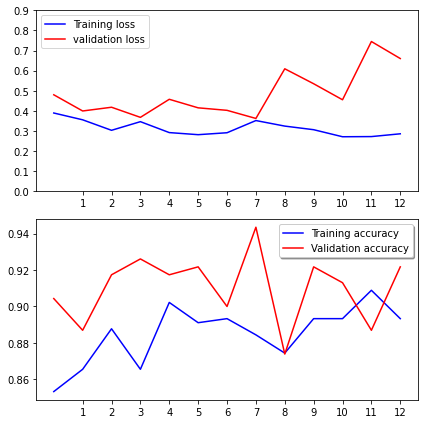

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
ax1.plot(model.history['loss'], color='b', label="Training loss")
ax1.plot(model.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 13, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend()

ax2.plot(model.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 13, 1))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

https://medium.com/@jayantbabu2001/image-classification-using-cnn-7f57dcd5dc7a

https://cnvrg.io/cnn-tensorflow/

In [33]:
import pandas as pd

metrics_df = pd.DataFrame(model.history)

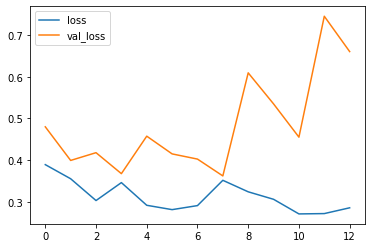

In [34]:
metrics_df[["loss","val_loss"]].plot()

In [35]:

metrics_df.columns


Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

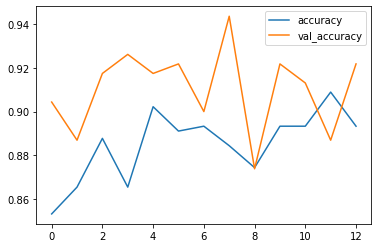

In [36]:

metrics_df[["accuracy","val_accuracy"]].plot()


In [37]:

loss, accuracy = classifier.evaluate(test_set)
print('Accuracy on test dataset:', accuracy)


23/23 [==============================] - 1s 35ms/step - loss: 0.6604 - accuracy: 0.9217
Accuracy on test dataset: 0.9217391014099121


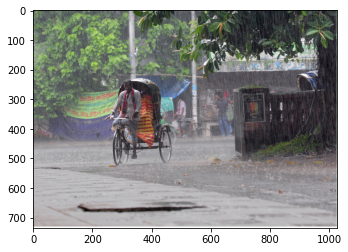

In [70]:
img_path="/CNN/MyDrive/Classification algorithm/CNN/dataset classification/test/rain/rain195.jpg"
test_image_orginal = image.load_img(img_path)
plt.imshow(test_image_orginal)

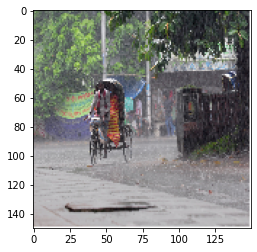

In [71]:

test_image = image.load_img(img_path, target_size=(150, 150))
plt.imshow(test_image)

In [72]:

test_image = image.img_to_array(test_image)
test_image.shape

(150, 150, 3)

In [73]:

test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 150, 150, 3)

https://www.youtube.com/watch?v=oOSXQP7C7ck

In [74]:
test_set.class_indices.items()

dict_items([('cloudy', 0), ('rain', 1), ('shine', 2), ('sunrise', 3)])

In [75]:

prediction = classifier.predict(test_image)
prediction

array([[0., 1., 0., 0.]], dtype=float32)

------------------------------------------------------------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------------------------------------------------------------
Prediction is :       rain
------------------------------------------------------------------------------------------------------------------------------------------------------


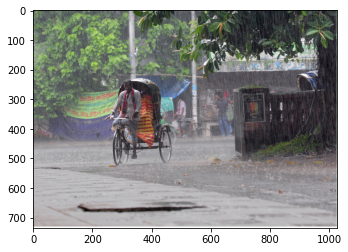

In [81]:
prediction = classifier.predict(test_image)
if(prediction[0][0]==1):
  print(f"-"*100)
  print("Prediction is :       cloudy")
  print(f"-"*150)
elif(prediction[0][1]==1):
  print(f"-"*150)
  print("Prediction is :       rain")
  print(f"-"*150)
elif(prediction[0][2]==1):
  print(f"-"*150)
  print("Prediction is :       shine")
  print(f"-"*150)
elif(prediction[0][3]==1):
  print(f"-"*150)
  print("Prediction is :       sunrise")
  print(f"-"*150)

plt.imshow(test_image_orginal)
plt.show()

In [77]:

prediction[0][0]


0.0

https://medium.com/@jayantbabu2001/image-classification-using-cnn-7f57dcd5dc7a